In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
import os
import scipy.stats as si
import sympy as sy

In [16]:
plt.style.use('default')

In [17]:
def d1(S, K, T, r, sigma,t):
    return (np.log(S / K) + (r + 0.5 * sigma ** 2) * (T-t)) / (sigma * np.sqrt(T-t))

In [18]:
def d2(S, K, T, r, sigma,t):
    return d1(S, K, T, r, sigma,t) - sigma*np.sqrt(T-t)

In [59]:
def call(S, K, T, r, sigma,t):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1val = d1(S, K, T, r, sigma,t)
    d2val  = d2(S, K, T, r, sigma,t) 
    call_val= (S * si.norm.cdf(d1val, 0.0, 1.0) - K * np.exp(-r * (T-t)) * si.norm.cdf(d2val, 0.0, 1.0))
    
    return call_val


In [75]:
def put(S, K, T, r, sigma,t):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1val = d1(S, K, T, r, sigma,t)
    d2val  = d2(S, K, T, r, sigma,t) 
    put_val= (-S * si.norm.cdf(-d1val, 0.0, 1.0) + K * np.exp(-r * (T-t)) * si.norm.cdf(-d2val, 0.0, 1.0))
    
    return put_val


In [20]:
S = 10
K = 4
T = 50
r = 0.01
sigma = 0.05
t =2 #np.linspace(0,T,T)

 
call_val = call(S, K, T, r, sigma,t)
call_val

call_val = np.zeros(T)
for i in range(T): 
    call_val[i] = call(S, K, T, r, sigma,i)

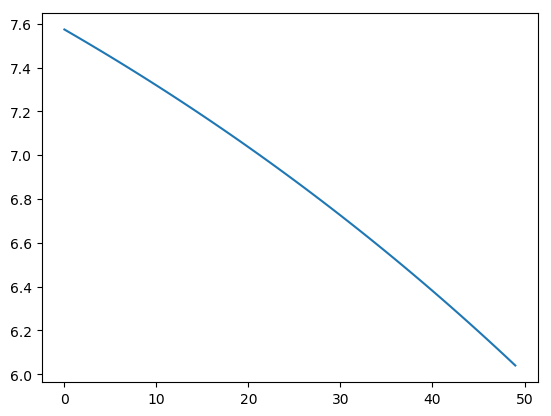

In [21]:
plot(call_val)

In [69]:
def function_call (S, K, T, r, sigma,t): 
    call_val = np.zeros(T)
    for i in range(T): 
        call_val[i] = call(S[i], K, T, r, sigma,i)
    return call_val

In [70]:
def function_put(S, K, T, r, sigma,t):
    put_val = np.zeros(T)
    for i in range(T): 
        put_val[i] = put(S[i], K, T, r, sigma,i)
    return put_val

In [71]:
def Brownian_movement(T): 
    w = np.zeros(T)
    for k in range(1,T):
        w[k] = w[k-1] + np.sqrt(1/T)*np.random.normal()
    return w    

In [72]:
def simulation(S0, T,t, mu, sigma,w) : 
    #mu : expected return of the underlying
    
    S = np.zeros(T)
    S[0] = S0

    for i in range(1,T):
       # S[i] = S[i-1]*(1+mu+sigma*w[i-1])
         S[i] = S0*exp((mu - sigma**2/2)*t[i]+sigma*w[i])
    return S

In [98]:
S = 10
K_Call = 4
K_Put = 16
T = 50
r = 0.01
sigma = 0.125
t = np.linspace(0,T,T)

 
Brownian = Brownian_movement(T)
Simulation = simulation(S, T, t, r, sigma, Brownian)
Call_Val = function_call(Simulation, K_Call, T, r, sigma,t)
Put_Val = function_put(Simulation, K_Put, T, r, sigma, t)

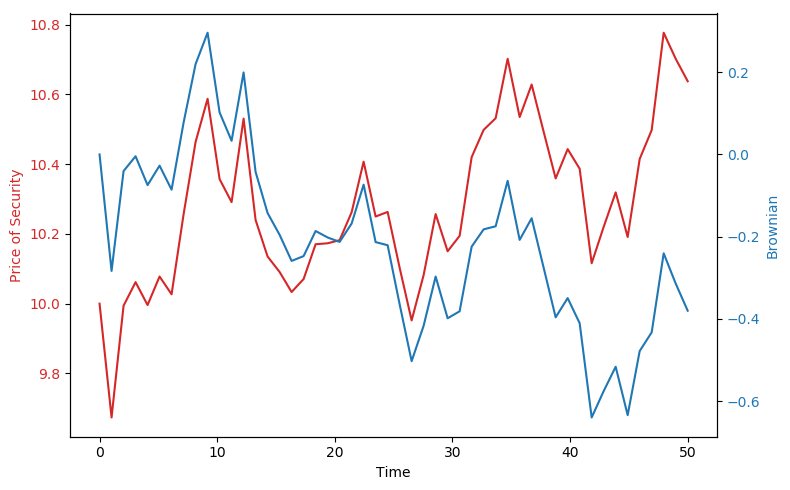

In [99]:
fig, ax1 = plt.subplots(figsize = (8,5))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price of Security', color=color)
ax1.plot(t, Simulation, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Brownian', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Brownian, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

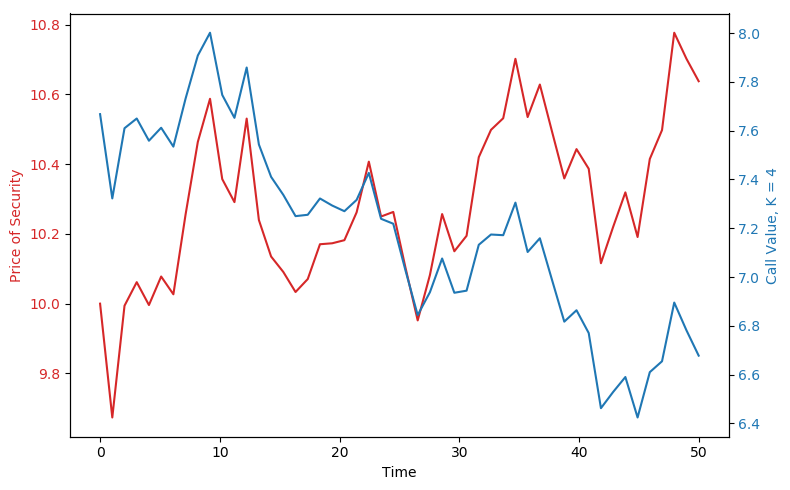

In [100]:
fig, ax1 = plt.subplots(figsize = (8,5))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price of Security', color=color)
ax1.plot(t, Simulation, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Call Value, K = 4', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Call_Val, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("")
plt.show()

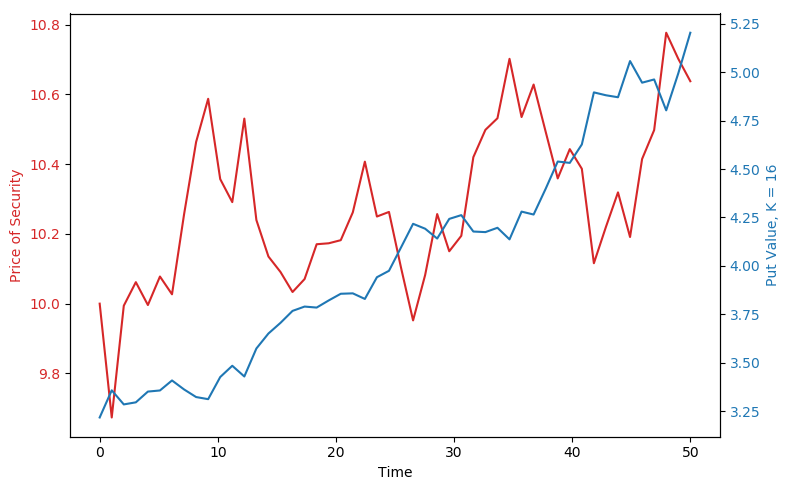

In [101]:
fig, ax1 = plt.subplots(figsize = (8,5))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price of Security', color=color)
ax1.plot(t, Simulation, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Put Value, K = 16', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Put_Val, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("")
plt.show()

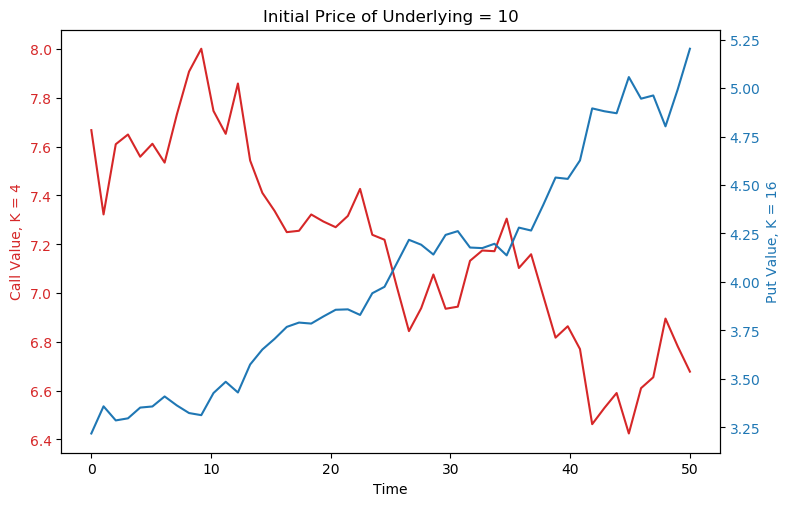

In [102]:
fig, ax1 = plt.subplots(figsize = (8,5))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Call Value, K = 4', color=color)
ax1.plot(t, Call_Val, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Put Value, K = 16', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Put_Val, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Initial Price of Underlying = 10")
plt.show()